### **Importing necessary libraries**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

### **Importing the data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML_Project/merged_usa_dataset.csv")
df.head()

,Entity,Year,Renewables (% electricity),Renewables (% equivalent primary energy),Biofuels Production - TWh - Total,Solar (% electricity),Hydro (% equivalent primary energy),Electricity from hydro (TWh),Electricity from wind (TWh),Hydro (% electricity),...,Electricity from solar (TWh),Other renewables including bioenergy (TWh),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Geothermal Capacity,Wind (% equivalent primary energy),Wind Capacity,Solar (% equivalent primary energy)
0,United States,1965,0.0,4.368870,0.0,0.0,4.074629,397.94818,0.0,0.0,...,0.0,13.332232,13.332232,0.0,0.0,198.97409,0.0,0.0,0.0,0.0
1,United States,1966,0.0,4.171402,0.0,0.0,3.877466,399.87380,0.0,0.0,...,0.0,14.062007,14.062007,0.0,0.0,199.93690,0.0,0.0,0.0,0.0
2,United States,1967,0.0,4.542216,0.0,0.0,4.258249,454.44162,0.0,0.0,...,0.0,14.073571,14.073571,0.0,0.0,227.22081,0.0,0.0,0.0,0.0
3,United States,1968,0.0,4.330974,0.0,0.0,4.035142,456.30942,0.0,0.0,...,0.0,15.546045,15.546045,0.0,0.0,228.15471,0.0,0.0,0.0,0.0
4,United States,1969,0.0,4.598878,0.0,0.0,4.305610,512.05706,0.0,0.0,...,0.0,16.227060,16.227060,0.0,0.0,256.02853,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      57 non-null     object 
 1   Year                                        57 non-null     int64  
 2   Renewables (% electricity)                  57 non-null     float64
 3   Renewables (% equivalent primary energy)    57 non-null     float64
 4   Biofuels Production - TWh - Total           57 non-null     float64
 5   Solar (% electricity)                       57 non-null     float64
 6   Hydro (% equivalent primary energy)         57 non-null     float64
 7   Electricity from hydro (TWh)                57 non-null     float64
 8   Electricity from wind (TWh)                 57 non-null     float64
 9   Hydro (% electricity)                       57 non-null     float64
 10  Wind (% electric

### **Data Preparation:**

##### **Dropping the Entity column as it's all United States and it isn't really required to perform analysis**

In [ ]:
df_usa = df.drop(['Entity'], axis=1)

In [ ]:
df_usa.head()

,Year,Renewables (% electricity),Renewables (% equivalent primary energy),Biofuels Production - TWh - Total,Solar (% electricity),Hydro (% equivalent primary energy),Electricity from hydro (TWh),Electricity from wind (TWh),Hydro (% electricity),Wind (% electricity),...,Electricity from solar (TWh),Other renewables including bioenergy (TWh),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Geothermal Capacity,Wind (% equivalent primary energy),Wind Capacity,Solar (% equivalent primary energy)
0,1965,0.0,4.368870,0.0,0.0,4.074629,397.94818,0.0,0.0,0.0,...,0.0,13.332232,13.332232,0.0,0.0,198.97409,0.0,0.0,0.0,0.0
1,1966,0.0,4.171402,0.0,0.0,3.877466,399.87380,0.0,0.0,0.0,...,0.0,14.062007,14.062007,0.0,0.0,199.93690,0.0,0.0,0.0,0.0
2,1967,0.0,4.542216,0.0,0.0,4.258249,454.44162,0.0,0.0,0.0,...,0.0,14.073571,14.073571,0.0,0.0,227.22081,0.0,0.0,0.0,0.0
3,1968,0.0,4.330974,0.0,0.0,4.035142,456.30942,0.0,0.0,0.0,...,0.0,15.546045,15.546045,0.0,0.0,228.15471,0.0,0.0,0.0,0.0
4,1969,0.0,4.598878,0.0,0.0,4.305610,512.05706,0.0,0.0,0.0,...,0.0,16.227060,16.227060,0.0,0.0,256.02853,0.0,0.0,0.0,0.0


##### **As we are performing clustering it requires only unlabeled dataset, so let us remove the labels in our dataset**

In [ ]:
# Taking only values from the dataframe and storing it in the dataframe
df_usa = pd.DataFrame(df_usa.values)

df_usa.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1965.0,0.0,4.368870,0.0,0.0,4.074629,397.94818,0.0,0.0,0.0,...,0.0,13.332232,13.332232,0.0,0.0,198.97409,0.0,0.0,0.0,0.0
1,1966.0,0.0,4.171402,0.0,0.0,3.877466,399.87380,0.0,0.0,0.0,...,0.0,14.062007,14.062007,0.0,0.0,199.93690,0.0,0.0,0.0,0.0
2,1967.0,0.0,4.542216,0.0,0.0,4.258249,454.44162,0.0,0.0,0.0,...,0.0,14.073571,14.073571,0.0,0.0,227.22081,0.0,0.0,0.0,0.0
3,1968.0,0.0,4.330974,0.0,0.0,4.035142,456.30942,0.0,0.0,0.0,...,0.0,15.546045,15.546045,0.0,0.0,228.15471,0.0,0.0,0.0,0.0
4,1969.0,0.0,4.598878,0.0,0.0,4.305610,512.05706,0.0,0.0,0.0,...,0.0,16.227060,16.227060,0.0,0.0,256.02853,0.0,0.0,0.0,0.0


In [ ]:
df_usa.columns = ['' for _ in df_usa.columns]

In [ ]:
df_usa.head()

,,,,,,,,,,,...,,,,,,,,,,
0,1965.0,0.0,4.368870,0.0,0.0,4.074629,397.94818,0.0,0.0,0.0,...,0.0,13.332232,13.332232,0.0,0.0,198.97409,0.0,0.0,0.0,0.0
1,1966.0,0.0,4.171402,0.0,0.0,3.877466,399.87380,0.0,0.0,0.0,...,0.0,14.062007,14.062007,0.0,0.0,199.93690,0.0,0.0,0.0,0.0
2,1967.0,0.0,4.542216,0.0,0.0,4.258249,454.44162,0.0,0.0,0.0,...,0.0,14.073571,14.073571,0.0,0.0,227.22081,0.0,0.0,0.0,0.0
3,1968.0,0.0,4.330974,0.0,0.0,4.035142,456.30942,0.0,0.0,0.0,...,0.0,15.546045,15.546045,0.0,0.0,228.15471,0.0,0.0,0.0,0.0
4,1969.0,0.0,4.598878,0.0,0.0,4.305610,512.05706,0.0,0.0,0.0,...,0.0,16.227060,16.227060,0.0,0.0,256.02853,0.0,0.0,0.0,0.0


#### **Scaling the dataset:**

In [ ]:
scaler = StandardScaler()
df_usa_scaled = scaler.fit_transform(df_usa)

### **K-Means Clustering**

#### **Finding the silhouette score on unscaled dataset and plotting the scores for different k-values**

In [ ]:
silhouette_vals = []
k_values = range(2, 10)

for i in k_values:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(df_usa)
    score = silhouette_score(df_usa, kmeans.labels_)
    print('k=%d, Silhouette Score: %.3f' % (i, score))
    silhouette_vals.append(score)

k=2, Silhouette Score: 0.881
k=3, Silhouette Score: 0.736
k=4, Silhouette Score: 0.791
k=5, Silhouette Score: 0.753
k=6, Silhouette Score: 0.734
k=7, Silhouette Score: 0.470
k=8, Silhouette Score: 0.470
k=9, Silhouette Score: 0.461


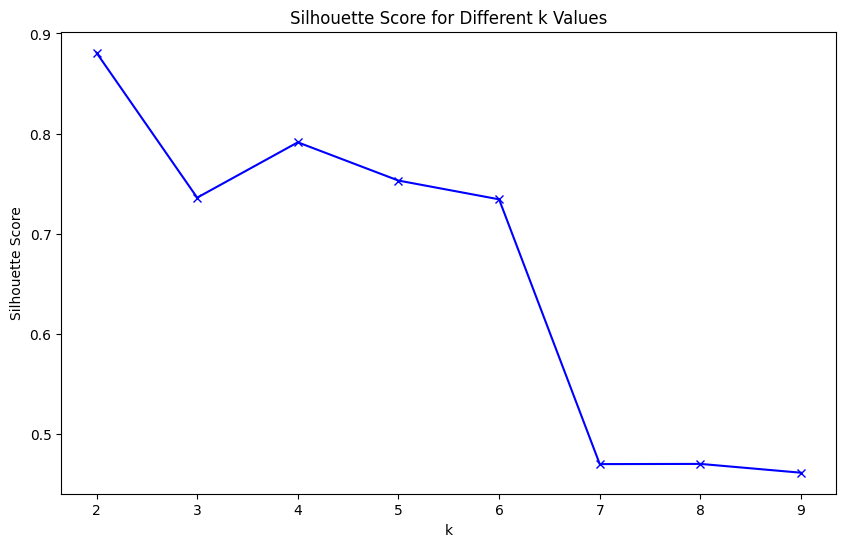

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_vals, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.show()

### **Plotting the clusters with their cluster centers on the unscaled dataset**

#### **Number of clusters = 2**

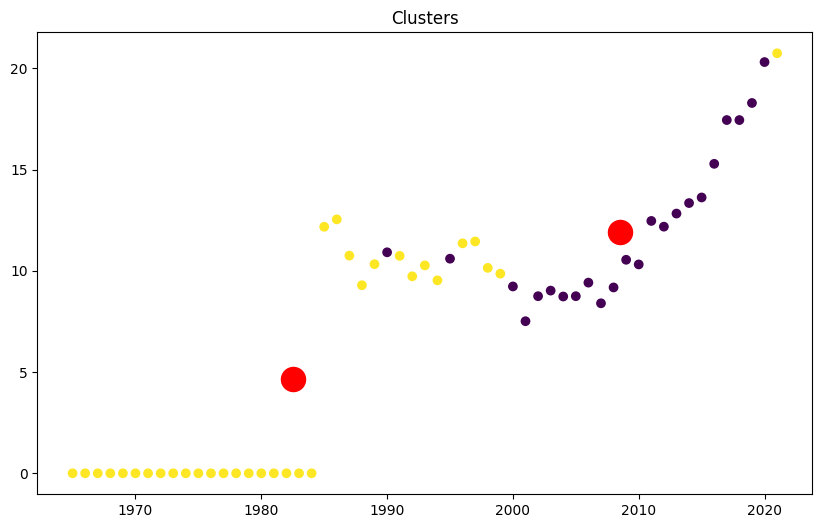

In [ ]:
kmeans = KMeans(n_clusters=2, n_init =10, random_state=42)
kmeans.fit(df_usa)

plt.figure(figsize=(10, 6))
plt.scatter(df_usa.iloc[:, 0], df_usa.iloc[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Clusters')
plt.show()

#### **Number of clusters = 3**

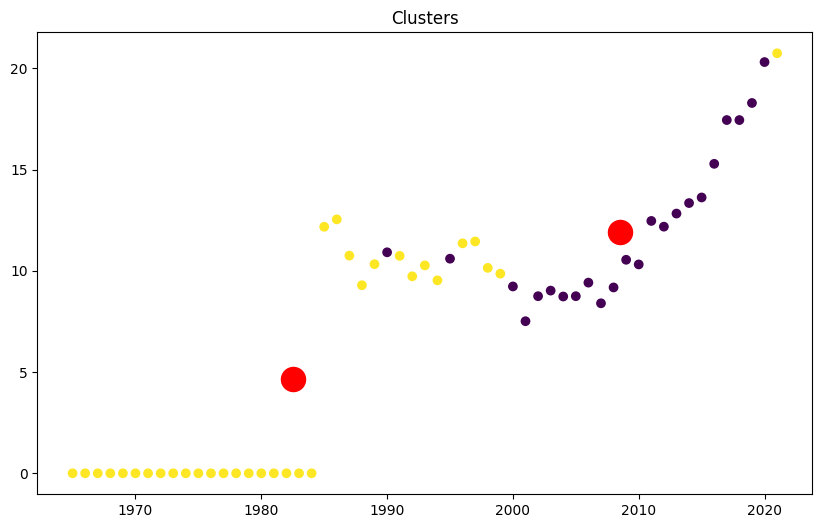

In [ ]:
kmeans = KMeans(n_clusters=2, n_init =10, random_state=42)
kmeans.fit(df_usa)

plt.figure(figsize=(10, 6))
plt.scatter(df_usa.iloc[:, 0], df_usa.iloc[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Clusters')
plt.show()

#### **Number of clusters = 4**

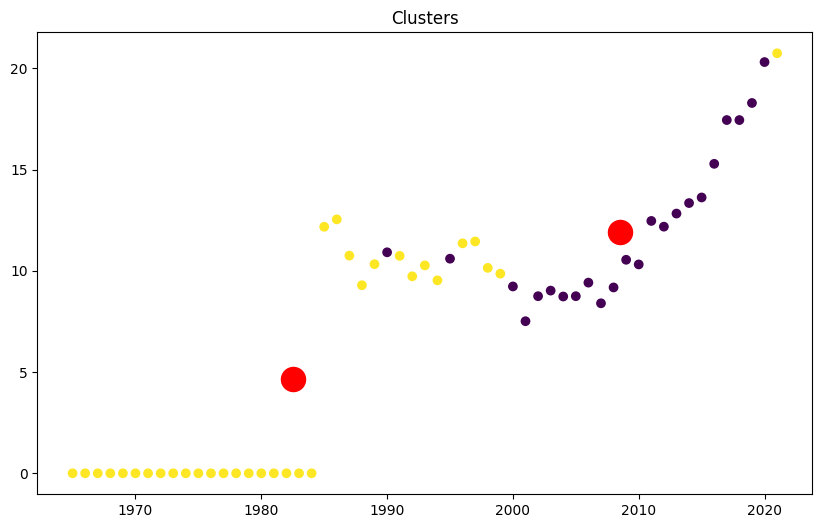

In [ ]:
kmeans = KMeans(n_clusters=2, n_init =10, random_state=42)
kmeans.fit(df_usa)

plt.figure(figsize=(10, 6))
plt.scatter(df_usa.iloc[:, 0], df_usa.iloc[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Clusters')
plt.show()

#### **Finding the silhouette score on scaled dataset and plotting the scores for different k-values**

In [ ]:
silhouette_vals = []
k_values = range(2, 10)

for i in k_values:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(df_usa_scaled)
    score = silhouette_score(df_usa_scaled, kmeans.labels_)
    print('k=%d, Silhouette Score: %.3f' % (i, score))
    silhouette_vals.append(score)

k=2, Silhouette Score: 0.554
k=3, Silhouette Score: 0.440
k=4, Silhouette Score: 0.444
k=5, Silhouette Score: 0.417
k=6, Silhouette Score: 0.410
k=7, Silhouette Score: 0.406
k=8, Silhouette Score: 0.420
k=9, Silhouette Score: 0.423


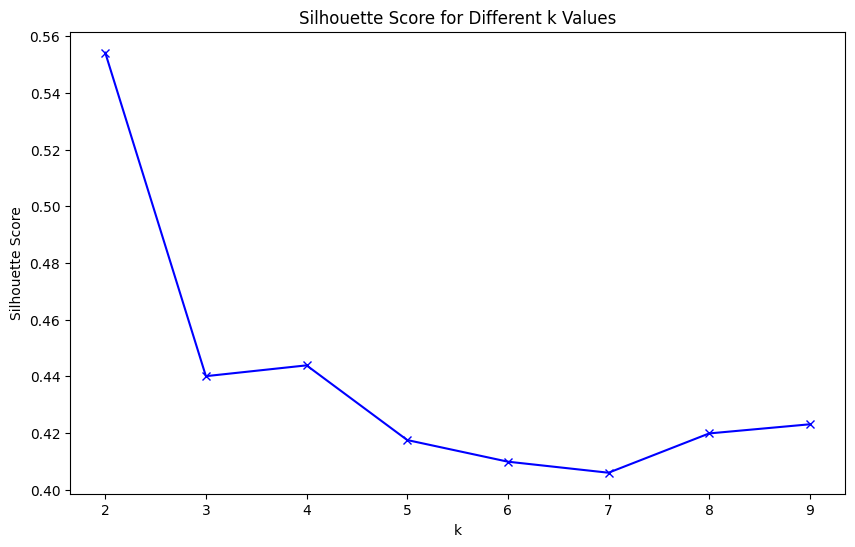

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_vals, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.show()

### **Plotting the clusters with their cluster centers on the scaled dataset**

#### **Number of clusters = 2**

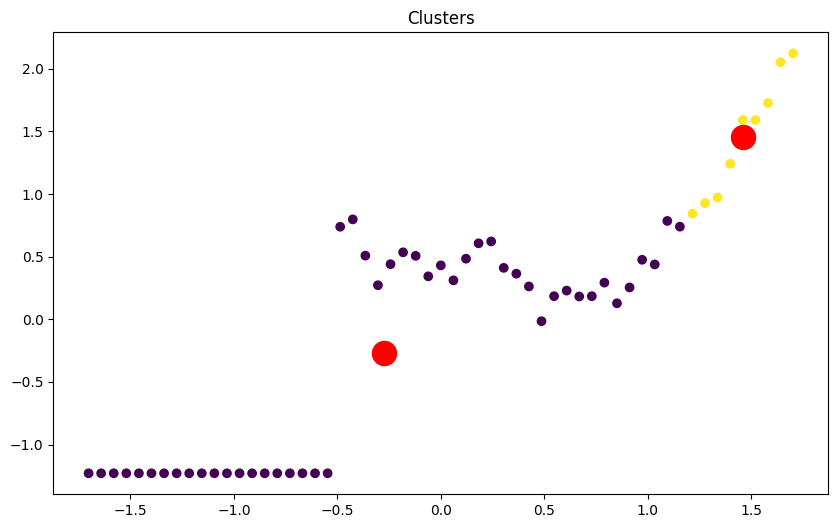

In [ ]:
kmeans = KMeans(n_clusters=2, n_init =10, random_state=42)
kmeans.fit(df_usa_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df_usa_scaled[:, 0], df_usa_scaled[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Clusters')
plt.show()

#### **Number of clusters = 3**

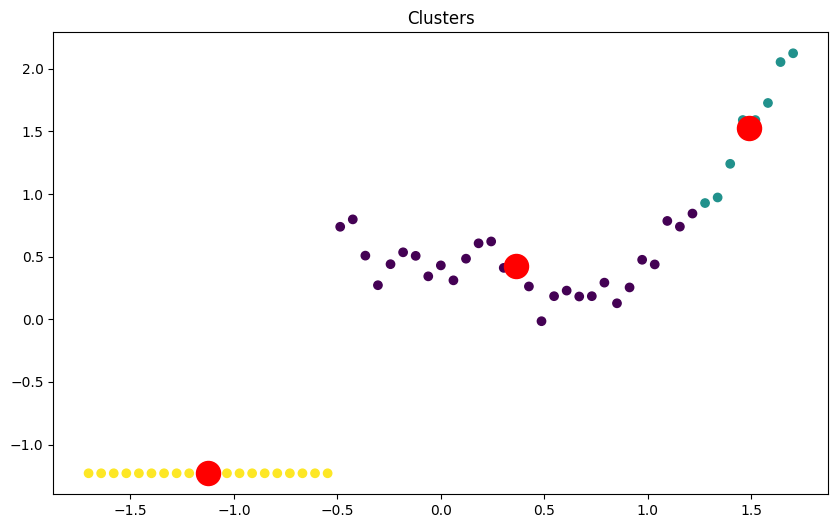

In [ ]:
kmeans = KMeans(n_clusters=3, n_init =10, random_state=42)
kmeans.fit(df_usa_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df_usa_scaled[:, 0], df_usa_scaled[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Clusters')
plt.show()

#### **Number of clusters = 4**

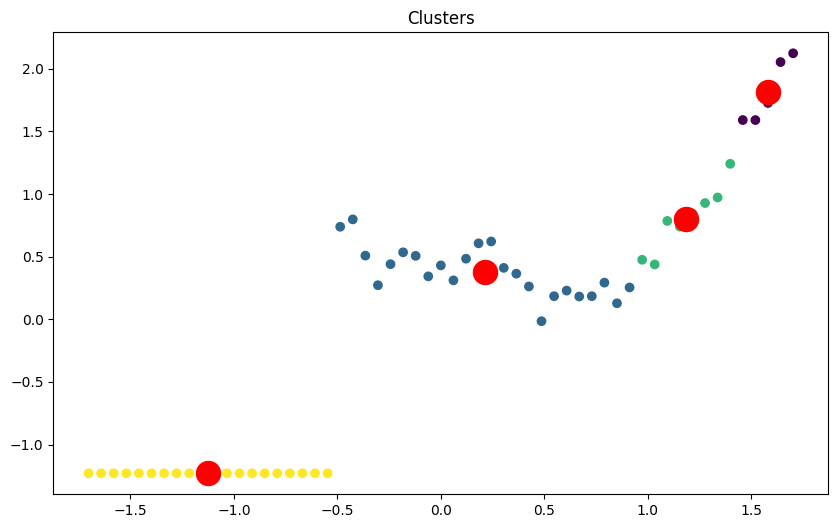

In [ ]:
kmeans = KMeans(n_clusters=4, n_init =10, random_state=42)
kmeans.fit(df_usa_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df_usa_scaled[:, 0], df_usa_scaled[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Clusters')
plt.show()

In [ ]:
# Fit the model
kmeans = KMeans(n_clusters=3, n_init = 10, random_state=42)
kmeans.fit(df_usa_scaled)

# Create a new DataFrame for the cluster labels
df_clusters = pd.DataFrame(kmeans.labels_, columns=['Cluster'])

# Concatenate the original DataFrame with the cluster labels DataFrame
df = pd.concat([df, df_clusters], axis=1)

In [ ]:
df.head()

,Entity,Year,Renewables (% electricity),Renewables (% equivalent primary energy),Biofuels Production - TWh - Total,Solar (% electricity),Hydro (% equivalent primary energy),Electricity from hydro (TWh),Electricity from wind (TWh),Hydro (% electricity),...,Other renewables including bioenergy (TWh),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Geothermal Capacity,Wind (% equivalent primary energy),Wind Capacity,Solar (% equivalent primary energy),Cluster
0,United States,1965,0.0,4.368870,0.0,0.0,4.074629,397.94818,0.0,0.0,...,13.332232,13.332232,0.0,0.0,198.97409,0.0,0.0,0.0,0.0,2
1,United States,1966,0.0,4.171402,0.0,0.0,3.877466,399.87380,0.0,0.0,...,14.062007,14.062007,0.0,0.0,199.93690,0.0,0.0,0.0,0.0,2
2,United States,1967,0.0,4.542216,0.0,0.0,4.258249,454.44162,0.0,0.0,...,14.073571,14.073571,0.0,0.0,227.22081,0.0,0.0,0.0,0.0,2
3,United States,1968,0.0,4.330974,0.0,0.0,4.035142,456.30942,0.0,0.0,...,15.546045,15.546045,0.0,0.0,228.15471,0.0,0.0,0.0,0.0,2
4,United States,1969,0.0,4.598878,0.0,0.0,4.305610,512.05706,0.0,0.0,...,16.227060,16.227060,0.0,0.0,256.02853,0.0,0.0,0.0,0.0,2
